## 2. 对专辑中歌曲进行情感分析并归类，给出得分

In [1]:
import pandas as pd
from textblob import TextBlob # 英文情感分析库
import matplotlib.pyplot as plt
import numpy as np
import gensim
from gensim import corpora,models
from gensim.models import CoherenceModel
from pprint import pprint
from stylecloud import gen_stylecloud
from collections import defaultdict
from gensim.models import Word2Vec

In [2]:
album_score = [] # 存放每张专辑的情感得分

### Taylor Swift

In [3]:
taylor = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/01-taylor_swift.csv")
name = pd.unique(taylor['track_title'])
l = len(name)
score = []
grouped = taylor.groupby('track_n')

# 按歌曲分组，遍历，加和求单首歌曲情感得分
for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

taylor_score = pd.DataFrame({'name': name, 'score': score})
taylor_total = sum(taylor_score['score'])
album_score.append(taylor_total)
taylor_score

,name,score
0,Tim McGraw,3.672024
1,Picture To Burn,-5.481250
2,Teardrops On My Guitar,4.233189
3,A Place In This World,3.872222
4,Cold As You,3.264583
5,The Outside,3.744048
6,Tied Together With A Smile,3.005000
7,Stay Beautiful,8.377083
8,Should've Said No,0.485714
9,Mary’s Song (Oh My My My),3.091667


### Fearless

In [4]:
fearless = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/02-fearless_taylors_version.csv")
name = pd.unique(fearless['track_title'])
l = len(name)
score = []
grouped = fearless.groupby('track_n')

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

fearless_score = pd.DataFrame({'name': name, 'score': score})
fearless_total = sum(fearless_score['score'])
album_score.append(fearless_total)
fearless_score

,name,score
0,Fearless (Taylor’s Version),7.453373
1,Fifteen (Taylor’s Version),4.137500
2,Love Story (Taylor’s Version),1.304167
3,Hey Stephen (Taylor’s Version),4.020833
4,White Horse (Taylor’s Version),-1.436111
5,You Belong With Me (Taylor’s Version),2.829444
6,Breathe (Taylor’s Version),-2.698611
7,Tell Me Why (Taylor’s Version),-3.389683
8,You’re Not Sorry (Taylor’s Version),1.011111
9,The Way I Loved You (Taylor’s Version),9.978571


### Speak Now

In [5]:
speak = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/03-speak_now_deluxe_package.csv")
name = pd.unique(speak['track_title'])
l = len(name)
score = []
grouped = speak.groupby('track_n')

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

speak_score = pd.DataFrame({'name': name, 'score': score})
speak_total = sum(speak_score['score'])
album_score.append(speak_total)
speak_score

,name,score
0,Mine,5.184524
1,Sparks Fly,5.495238
2,Back to December,2.113095
3,Speak Now,0.849802
4,Dear John,-1.255952
5,Mean,-7.644048
6,The Story of Us,2.738889
7,Never Grow Up,1.634280
8,Enchanted,6.844697
9,Better Than Revenge,5.630159


### Red

In [6]:
red = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/04-red_deluxe_edition.csv")
name = pd.unique(red['track_title'])
l = len(name)
score = []
grouped = red.groupby('track_n')

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

red_score = pd.DataFrame({'name': name, 'score': score})
red_total = sum(red_score['score'])
album_score.append(red_total)
red_score

,name,score
0,State of Grace,3.785498
1,Red,4.126443
2,Treacherous,1.064286
3,I Knew You Were Trouble,-4.510065
4,All Too Well,2.141667
5,22,2.405000
6,I Almost Do,-0.469444
7,We Are Never Ever Getting Back Together,0.704464
8,Stay Stay Stay,7.347917
9,The Last Time,4.896429


### 1989

In [7]:
_1989 = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/05-1989_deluxe.csv")
name = pd.unique(_1989['track_title'])
l = len(name)
score = []
grouped = _1989.groupby('track_n')

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

_1989_score = pd.DataFrame({'name': name, 'score': score})
_1989_total = sum(_1989_score['score'])
album_score.append(_1989_total)
_1989_score

,name,score
0,Welcome to New York,14.728030
1,Blank Space,-3.065303
2,Style,-0.210417
3,Out of the Woods,3.716667
4,All You Had to Do Was Stay,1.691667
5,Shake It Off,-5.489033
6,I Wish You Would,0.392965
7,Bad Blood,-12.937392
8,Wildest Dreams,2.620833
9,How You Get the Girl,-1.000000


### Reputation

In [8]:
rep = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/06-reputation.csv")
name = pd.unique(rep['track_title'])
l = len(name)
score = []
grouped = rep.groupby('track_n')

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

rep_score = pd.DataFrame({'name': name, 'score': score})
rep_total = sum(rep_score['score'])
album_score.append(rep_total)
rep_score

,name,score
0,...Ready for It?,1.185000
1,End Game,-4.120833
2,I Did Something Bad,7.900000
3,Don’t Blame Me,1.129167
4,Delicate,1.733333
5,Look What You Made Me Do,-0.925595
6,So It Goes...,0.480754
7,Gorgeous,8.109702
8,Getaway Car,5.966667
9,King of My Heart,-0.965657


### Lover

In [9]:
lover = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/07-lover.csv")
name = pd.unique(lover['track_title'])
l = len(name)
score = []
grouped = lover.groupby('track_n')

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

lover_score = pd.DataFrame({'name': name, 'score': score})
lover_total = sum(lover_score['score'])
album_score.append(lover_total)
lover_score

,name,score
0,I Forgot That You Existed,3.663492
1,Cruel Summer,-3.451385
2,Lover,1.605000
3,The Man,-2.933333
4,The Archer,3.426190
5,I Think He Knows,-1.337500
6,Miss Americana & The Heartbreak Prince,5.730000
7,Paper Rings,-2.140000
8,Cornelia Street,-1.120779
9,Death by a Thousand Cuts,2.950000


### Folklore

In [10]:
folklore = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/08-folklore_deluxe_version.csv")
name = pd.unique(folklore['track_title'])
l = len(name)
score = []
grouped = folklore.groupby('track_n')

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

folklore_score = pd.DataFrame({'name': name, 'score': score})
folklore_total = sum(folklore_score['score'])
album_score.append(folklore_total)
folklore_score

,name,score
0,the 1,5.037121
1,cardigan,3.273030
2,​the last great american dynasty,7.669066
3,​exile,2.406429
4,my tears ricochet,-1.112500
5,​mirrorball,2.894444
6,seven,3.422753
7,august,-0.963636
8,this is me trying,-2.909722
9,​illicit affairs,-1.246746


### Evermore

In [11]:
evermore = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/09-evermore_deluxe_version.csv")
name = pd.unique(evermore['track_title'])
l = len(name)
score = []
grouped = evermore.groupby('track_n')

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

evermore_score = pd.DataFrame({'name': name, 'score': score})
evermore_total = sum(evermore_score['score'])
album_score.append(evermore_total)
evermore_score

,name,score
0,willow,2.273810
1,champagne problems,0.225000
2,​gold rush,3.911905
3,​’tis the damn season,4.935714
4,​tolerate it,3.525000
5,"​no body, no crime",1.686364
6,​happiness,11.711670
7,​dorothea,-1.177778
8,​coney island,-1.038492
9,​ivy,1.670979


### Midnights

In [12]:
midnight = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/10-midnights.csv")
name = pd.unique(midnight['track_title'])
l = len(name)
score = []
grouped = midnight.groupby(midnight['track_n'])

for i in range(l):
    song = grouped.get_group(i + 1)
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

midnight_score = pd.DataFrame({'name': name, 'score': score})
midnight_total = sum(midnight_score['score'])
album_score.append(midnight_total)
midnight_score

,name,score
0,lavendar haze,2.368182
1,maroon,-2.227273
2,anti hero,0.433333
3,snow on the beach,-4.833333
4,youre on your own kid,6.150000
5,rain,7.550000
6,question,2.690476
7,vigilante shit,-4.791667
8,bejeweled,10.814167
9,labyrinth,8.384188


### 按专辑计算情绪总得分，并排序，给出专辑整体情绪

In [13]:
album_name = ['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989', 'Reputation', 'Lover', 'Folklore', 'Evermore', 'Midnights']
album_sentiment = pd.DataFrame({'name': album_name, 'score': album_score})
album_sentiment = album_sentiment.sort_values(by = 'score', axis = 0, ascending = False)
album_sentiment = album_sentiment.reset_index(drop = True)
album_sentiment

,name,score
0,Red,61.852679
1,Fearless,55.260298
2,Evermore,54.547799
3,Midnights,50.993131
4,Taylor Swift,47.019800
5,Speak Now,41.709003
6,Reputation,34.629450
7,Lover,31.166502
8,1989,22.528452
9,Folklore,14.064998


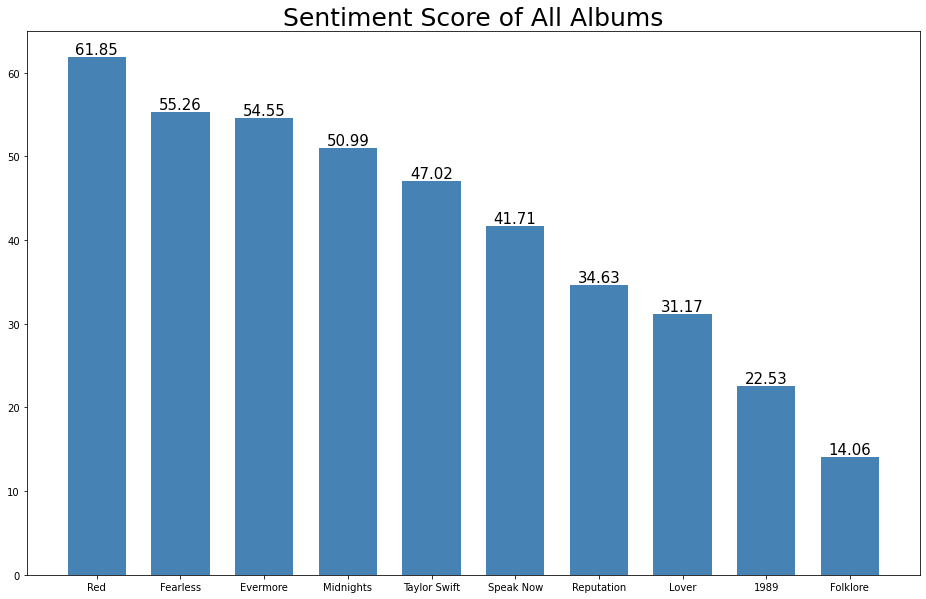

In [14]:
# 绘制柱状图
x = np.array(album_sentiment['name'])
y = np.array(album_sentiment['score'])

fig, ax = plt.subplots(figsize = (16, 10))
ax.bar(x = x,
      height = y,
      width = 0.7,
      align = 'center',
      color = 'steelblue')
ax.set_title("Sentiment Score of All Albums", fontsize = 25)

# 给柱状图上方加数值标签
for a,b in zip(x, y):
    plt.text(a, b, '%.2f'%b, ha = 'center', va = 'bottom', fontsize = 15)

plt.savefig("D:/intro/DaSE_intro/final/pics/sentiment_score_sorted.jpg", dpi = 1000)
plt.show()

### 所有歌曲合集

In [15]:
all_songs = pd.read_csv("D:/intro/DaSE_intro/final/lyrics/lyrics_2006-2022.csv")
name = pd.unique(all_songs['track_title'])
l = len(name)
score = []
grouped = all_songs.groupby(all_songs['track_title'])

for i in range(l):
    song = grouped.get_group(str(name[i]))
    total = 0
    for s in song['lyric']:
        judge = TextBlob(s)
        total += judge.sentiment.polarity
    score.append(total)

all_score = pd.DataFrame({'name': name, 'score': score})

In [16]:
# 对所有歌曲得分降序排序
all_score = all_score.sort_values(by = 'score', axis = 0, ascending = False) # ascending：是否升序排序
all_score = all_score.reset_index(drop = True)
# all_score.to_csv("sentiment_sort.csv")

all_positive = all_score[all_score['score'] > 0]
all_positive = all_positive.reset_index(drop = True)
print("positive: ", len(all_positive))

all_negative = all_score[all_score['score'] < 0]
all_negative = all_negative.sort_values(by = 'score', axis = 0, ascending = True)
all_negative = all_negative.reset_index(drop = True)
print("negative: ", len(all_negative))

# all_positive.head()
all_negative.head()

positive:  134
negative:  49


,name,score
0,Bad Blood,-12.937392
1,Mean,-7.644048
2,​mad woman,-6.962500
3,Shake It Off,-5.489033
4,Picture To Burn,-5.481250


## 3. 正负向歌词词语频率

### 负向

In [17]:
negative = np.array(all_negative['name'])
for i in range(len(negative)):
    negative[i] = negative[i].strip(u'\u200b')
negative = set(negative) # 负向情绪歌名

negative_lyric = []
all_songs_array = np.array(all_songs)
for i in range(9370):
    if all_songs_array[i][1] in negative:
        negative_lyric.append(all_songs_array[i][3])
negative_lyric = pd.DataFrame({'lyric': negative_lyric})
negative_lyric

,lyric
0,"Say you're sorry, that face of an angel"
1,Comes out just when you need it to
2,As I paced back and forth all this time
3,'Cause I honestly believed in you
4,"Holdin' on, the days drag on"
...,...
2297,You'd be here by now
2298,It's not the kind of ending you want to see now
2299,"Baby, what about the ending?"
2300,"Oh, I thought you'd be here by now"


In [18]:
# 小写
negative_lyric['clean_lyric'] = pd.Series(negative_lyric['lyric'], dtype = "string")
negative_lyric['clean_lyric'] = negative_lyric['clean_lyric'].str.lower()

# 去掉stop words
stopword = open("D:/intro/DaSE_intro/final/stopwords.txt", 'r').read()
negative_lyric['clean_lyric'] = negative_lyric['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))

# 去掉标点
negative_lyric['clean_lyric'] = negative_lyric['clean_lyric'].str.replace('[^\w\s]', '')
negative_lyric['clean_lyric'] = negative_lyric['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))
negative_lyric.head()
# negative_lyric.to_csv('./negative_lyric.csv')

C:\Users\86155\AppData\Local\Temp\ipykernel_12132\15574862.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  negative_lyric['clean_lyric'] = negative_lyric['clean_lyric'].str.replace('[^\w\s]', '')


,lyric,clean_lyric
0,"Say you're sorry, that face of an angel",face angel
1,Comes out just when you need it to,
2,As I paced back and forth all this time,paced
3,'Cause I honestly believed in you,honestly believed
4,"Holdin' on, the days drag on",holdin days drag


### 获得词频

In [19]:
sentence = [] # 分割好的清理后歌词
for s in negative_lyric['clean_lyric']:
    sentence.append(str(s))
for i in range(len(sentence)):
    sentence[i] = sentence[i].split()

# 跑完第一次stop words去的不干净
sentences = [[word for word in line if word not in stopword]for line in sentence]

model = gensim.models.Word2Vec(sentences, min_count = 25, window = 5)
words = list(model.wv.key_to_index) # 所有单词

In [20]:
# 获得词频
frequency = defaultdict(int)
for line in sentences:
    for token in line:
        frequency[token] += 1
words_frequency = [frequency[word] for word in words]
word_frequency = pd.DataFrame({"单词":words,"频率":words_frequency})
word_frequency.head(10)

,单词,频率
0,shake,79
1,baby,75
2,bad,47
3,love,40
4,forever,33
5,night,33
6,trouble,32
7,girl,32
8,waiting,28
9,thought,27


### 绘制词云图

In [21]:
sentence = [line.strip() for line in negative_lyric['clean_lyric']]
cut_word = " ".join(sentence)

gen_stylecloud(text = cut_word,
              gradient = 'horizontal',
              size = 1024,
              palette = 'tableau.BlueRed_12',
              background_color = 'white',
              max_words = 100,
              collocations = False,
              icon_name = 'fas fa-square',
              output_name = r'D:/intro/DaSE_intro/final/pics/negative.png')

### LDA主题聚类

In [22]:
neg_clean = cut_word.split()
neg_dict = corpora.Dictionary([neg_clean])
neg_corpus=[neg_dict.doc2bow([i]) for i in neg_clean]
neg_lda=models.LdaModel(neg_corpus, num_topics = 4, id2word = neg_dict)

pprint(neg_lda.print_topics())
doc_lda = neg_lda[neg_corpus]

[(0,
  '0.039*"love" + 0.033*"game" + 0.028*"thought" + 0.023*"mine" + '
  '0.018*"break" + 0.016*"sick" + 0.015*"things" + 0.015*"picture" + '
  '0.015*"eyes" + 0.014*"wanted"'),
 (1,
  '0.044*"shake" + 0.032*"dancing" + 0.032*"street" + 0.030*"walk" + '
  '0.029*"night" + 0.029*"hands" + 0.017*"feel" + 0.014*"rains" + '
  '0.014*"wrong" + 0.013*"lost"'),
 (2,
  '0.018*"bad" + 0.011*"soul" + 0.010*"cornelia" + 0.010*"tied" + 0.009*"play" '
  '+ 0.009*"bless" + 0.009*"knew" + 0.008*"feeling" + 0.008*"friends" + '
  '0.007*"heard"'),
 (3,
  '0.051*"baby" + 0.037*"waiting" + 0.036*"big" + 0.024*"lose" + 0.024*"girl" '
  '+ 0.022*"heart" + 0.021*"forever" + 0.018*"song" + 0.018*"trouble" + '
  '0.015*"bye"')]


### 正向

In [23]:
positive = np.array(all_positive['name'])
for i in range(len(positive)):
    positive[i] = positive[i].strip(u'\u200b')
positive = set(positive) # 负向情绪歌名

positive_lyric = []
# all_songs_array = np.array(all_songs)
for i in range(9370):
    if all_songs_array[i][1] in positive:
        positive_lyric.append(all_songs_array[i][3])
positive_lyric = pd.DataFrame({'lyric': positive_lyric})
positive_lyric

,lyric
0,There's something 'bout the way
1,The street looks when it's just rained
2,"There's a glow off the pavement, you walk me t..."
3,And you know I wanna ask you to dance right there
4,"In the middle of the parking lot, yeah"
...,...
5890,I'll be right here on the ground
5891,When you come back down
5892,"La, la, la, la, la, la"
5893,"La, la, la, la, la, la"


In [24]:
# 小写
positive_lyric['clean_lyric'] = pd.Series(positive_lyric['lyric'], dtype = "string")
positive_lyric['clean_lyric'] = positive_lyric['clean_lyric'].str.lower()

# 去掉stop words
stopword = open("D:/intro/DaSE_intro/final/stopwords.txt", 'r').read()
positive_lyric['clean_lyric'] = positive_lyric['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))

# 去掉标点
positive_lyric['clean_lyric'] = positive_lyric['clean_lyric'].str.replace('[^\w\s]', '')
positive_lyric['clean_lyric'] = positive_lyric['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))
positive_lyric.head()
positive_lyric.to_csv('./positive_lyric.csv')

C:\Users\86155\AppData\Local\Temp\ipykernel_12132\616533622.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  positive_lyric['clean_lyric'] = positive_lyric['clean_lyric'].str.replace('[^\w\s]', '')


### 获得词频

In [25]:
sentence = [] # 分割好的清理后歌词

for s in positive_lyric['clean_lyric']:
    sentence.append(str(s))
for i in range(len(sentence)):
    sentence[i] = sentence[i].split()

# 跑完第一次stop words去的不干净
sentences = [[word for word in line if word not in stopword]for line in sentence]

model = gensim.models.Word2Vec(sentences, min_count = 25, window = 5)
words = list(model.wv.key_to_index) # 所有单词

In [26]:
# 获得词频
frequency = defaultdict(int)
for line in sentences:
    for token in line:
        frequency[token] += 1
words_frequency = [frequency[word] for word in words]
word_frequency = pd.DataFrame({"单词":words,"频率":words_frequency})
word_frequency.head(10)

,单词,频率
0,love,269
1,baby,111
2,stay,107
3,night,89
4,good,85
5,feel,76
6,things,65
7,eyes,62
8,knew,58
9,girl,58


### 绘制词云

In [27]:
sentence = [line.strip() for line in positive_lyric['clean_lyric']]
cut_word = " ".join(sentence)

gen_stylecloud(text = cut_word,
              gradient = 'horizontal',
              size = 1024,
              palette = 'cmocean.sequential.Dense_16',
              background_color = 'white',
              max_words = 100,
              collocations = False,
              icon_name = 'fas fa-certificate',
              output_name = r'D:/intro/DaSE_intro/final/pics/positive.png')

### LDA主题聚类

In [28]:
# LDA主题模型
pos_clean = cut_word.split()
pos_dict = corpora.Dictionary([pos_clean])
pos_corpus = [pos_dict.doc2bow([i]) for i in pos_clean]
pos_lda = models.LdaModel(pos_corpus, num_topics = 4, id2word = pos_dict)

pprint(pos_lda.print_topics())
doc_lda1 = pos_lda[pos_corpus]

[(0,
  '0.042*"day" + 0.029*"mind" + 0.023*"forget" + 0.020*"superman" + '
  '0.018*"lips" + 0.016*"pretenders" + 0.015*"ground" + 0.015*"someday" + '
  '0.013*"rocks" + 0.012*"smile"'),
 (1,
  '0.040*"live" + 0.031*"watch" + 0.020*"kiss" + 0.019*"people" + '
  '0.017*"bring" + 0.016*"daylight" + 0.015*"pretty" + 0.013*"good" + '
  '0.012*"mine" + 0.012*"today"'),
 (2,
  '0.031*"things" + 0.025*"eyes" + 0.023*"baby" + 0.022*"night" + '
  '0.021*"remember" + 0.021*"thought" + 0.018*"feel" + 0.017*"knew" + '
  '0.017*"beautiful" + 0.016*"girl"'),
 (3,
  '0.087*"love" + 0.035*"life" + 0.031*"forever" + 0.022*"save" + '
  '0.018*"lights" + 0.018*"shine" + 0.018*"screaming" + 0.017*"wishing" + '
  '0.014*"walls" + 0.014*"high"')]
